<a href="https://colab.research.google.com/github/brnnwon/Fraud-detection/blob/main/4_Auto_Insurance_Fraud_Detection_RandomOversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [2]:
url = 'https://raw.githubusercontent.com/brnnwon/Fraud-detection/main/fraud_oracle.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.shape

(15420, 33)

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [4]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

#Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from collections import Counter

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [7]:
df.drop(columns = 'PolicyNumber', inplace = True)

In [8]:
for column in df:
  print(column)
  print(sorted(df[column].unique()), '\n')

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

<Axes: >

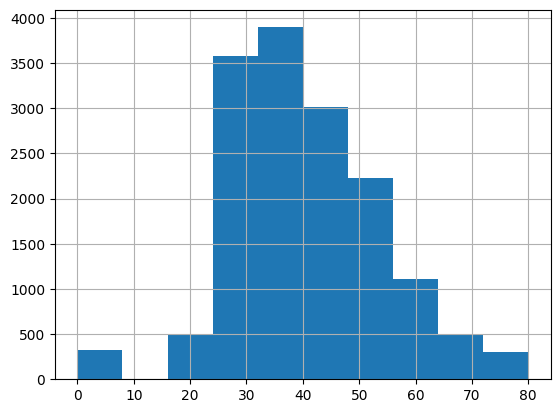

In [ ]:
df['Age'].hist()

In [10]:
mean_age = df[df['Age'] > 0]['Age'].mean()

print(mean_age)

40.700331125827816


In [11]:
# Replace age values equal to 0 with the calculated mean
df['Age'] = df['Age'].apply(lambda x: mean_age if x == 0 else x)

<Axes: >

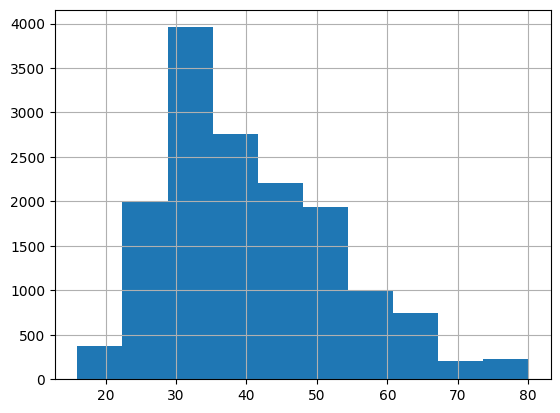

In [12]:
df['Age'].hist()

In [13]:
df['AccidentArea'] = df['AccidentArea'].replace({'Urban':1, 'Rural':0})
df['Sex'] = df['Sex'].replace({'Female':1, 'Male':0})
df['Fault'] = df['Fault'].replace({'Policy Holder':1, 'Third Party':0})
df['PoliceReportFiled'] = df['PoliceReportFiled'].replace({'Yes':1, 'No':0})
df['WitnessPresent'] = df['WitnessPresent'].replace({'Yes':1, 'No':0})
df['AgentType'] = df['AgentType'].replace({'External':1, 'Internal':0})
df['Month'] = df['Month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
df['DayOfWeek'] = df['DayOfWeek'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df['MonthClaimed'] = df['MonthClaimed'].replace({'0':0,'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].replace({'0':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace({'none':0 ,'1':1,'2 to 4':2,'more than 4':3})
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace({'none':0,'1 to 2':1,'3 to 5':2,'more than 5':4})
df['VehiclePrice'] = df['VehiclePrice'].replace({'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,
                                                 '40000 to 59000':3,'60000 to 69000':4,'more than 69000':5})
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace({'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2})
df['Days_Policy_Accident'] = df['Days_Policy_Accident'].replace({'none':0, '1 to 7':1, '8 to 15':2, '15 to 30':3, 'more than 30':4})
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].replace({'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3})
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace({'16 to 17':0, '18 to 20':1, '21 to 25':2, '26 to 30':3, '31 to 35':4, '36 to 40':5, '41 to 50':6, '51 to 65':7, 'over 65':8})
df['AddressChange_Claim'] = df['AddressChange_Claim'].replace({'no change':0, 'under 6 months':1, '1 year':2, '2 to 3 years':3, '4 to 8 years':4})
df['NumberOfCars'] = df['NumberOfCars'].replace({'1 vehicle':0, '2 vehicles':1, '3 to 4':2, '5 to 8':3, 'more than 8':4})

In [14]:
# Calculate the median of non-zero day-of-week values
median_day_of_week = df[df['DayOfWeekClaimed'] != 0]['DayOfWeekClaimed'].mode()
print(median_day_of_week)

0    1
Name: DayOfWeekClaimed, dtype: int64


In [15]:
# Replace '0' values with the calculated median
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].apply(lambda x: median_day_of_week if x == 0 else x)

In [16]:
mode_month_claimed = df[df['MonthClaimed'] != 0]['MonthClaimed'].mode()
print(mode_month_claimed)

0    1
Name: MonthClaimed, dtype: int64


In [17]:
# Replace '0' values with the calculated median
df['MonthClaimed'] = df['MonthClaimed'].apply(lambda x: mode_month_claimed if x == 0 else x)

In [18]:
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].astype('int')
df['MonthClaimed'] = df['MonthClaimed'].astype('int')

In [19]:
ohe_cols = ['Make', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'BasePolicy']

In [20]:
df = pd.get_dummies(df, columns=ohe_cols)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            15420 non-null  int64  
 1   WeekOfMonth                      15420 non-null  int64  
 2   DayOfWeek                        15420 non-null  int64  
 3   AccidentArea                     15420 non-null  int64  
 4   DayOfWeekClaimed                 15420 non-null  int64  
 5   MonthClaimed                     15420 non-null  int64  
 6   WeekOfMonthClaimed               15420 non-null  int64  
 7   Sex                              15420 non-null  int64  
 8   Age                              15420 non-null  float64
 9   Fault                            15420 non-null  int64  
 10  VehiclePrice                     15420 non-null  int64  
 11  FraudFound_P                     15420 non-null  int64  
 12  RepNumber         

In [22]:
X = df.drop('FraudFound_P', axis = 1)
y = df['FraudFound_P']

In [23]:
print(X.shape, y.shape)

(15420, 64) (15420,)


In [24]:
counter = Counter(y)
print(counter)

Counter({0: 14497, 1: 923})


In [25]:
# transform the dataset
X, y = RandomOverSampler(sampling_strategy='minority').fit_resample(X, y)
#X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X, y, test_size=0.2)

In [26]:
print(X.shape)
print(y.shape)

(28994, 64)
(28994,)


In [27]:
counter = Counter(y)
print(counter)

Counter({0: 14497, 1: 14497})


Train set, Validation set, Test set

In [28]:
# Assuming X, y are your features and labels after resampling
# First split: 85% for the combined training and validation, 15% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Second split: From the 85% data, split into 70% training and 15% validation
# To achieve this, we use test_size ≈ 0.1765 because 15% of the original is approximately 17.65% of the 85% data
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

# Print the shapes to verify
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (20294, 64) (20294,)
Validation set: (4350, 64) (4350,)
Test set: (4350, 64) (4350,)


In [29]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 14497, 1: 14497})


In [30]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_val_scaled

array([[-0.06015025,  0.97116566, -1.42562491, ..., -0.78249499,
         1.15754285, -0.48882506],
       [-0.06015025, -1.37335663,  0.06262776, ...,  1.27796346,
        -0.8638989 , -0.48882506],
       [ 0.8178328 , -1.37335663, -0.92954069, ...,  1.27796346,
        -0.8638989 , -0.48882506],
       ...,
       [-0.06015025,  0.97116566,  1.05479621, ...,  1.27796346,
        -0.8638989 , -0.48882506],
       [ 0.8178328 ,  1.75267308,  0.55871198, ..., -0.78249499,
         1.15754285, -0.48882506],
       [ 1.40315483, -0.5918492 , -0.92954069, ...,  1.27796346,
        -0.8638989 , -0.48882506]])

In [32]:
# Reshape the datasets for Conv1D
X_train_re = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_re = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_re = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Check the shape again
print("Training set shape:", X_train_re.shape)
print("Validation set shape:", X_val_re.shape)
print("Test set shape:", X_test_re.shape)

Training set shape: (20294, 64, 1)
Validation set shape: (4350, 64, 1)
Test set shape: (4350, 64, 1)


#CNN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [34]:
model = Sequential()

#1st layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train_re[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(rate=0.2))
#2nd layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(rate=0.2))
# build DNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 63, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 30, 64)            2

In [36]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train_re, y_train, epochs=50, validation_data=(X_val_re, y_val))

Epoch 1/50
635/635 [==============================] - 20s 8ms/step - loss: 0.7733 - accuracy: 0.6220 - val_loss: 0.5470 - val_accuracy: 0.7453
Epoch 2/50
635/635 [==============================] - 5s 8ms/step - loss: 0.5994 - accuracy: 0.6985 - val_loss: 0.5220 - val_accuracy: 0.7492
Epoch 3/50
635/635 [==============================] - 5s 8ms/step - loss: 0.5642 - accuracy: 0.7187 - val_loss: 0.5073 - val_accuracy: 0.7552
Epoch 4/50
635/635 [==============================] - 4s 7ms/step - loss: 0.5447 - accuracy: 0.7343 - val_loss: 0.4939 - val_accuracy: 0.7637
Epoch 5/50
635/635 [==============================] - 5s 8ms/step - loss: 0.5320 - accuracy: 0.7376 - val_loss: 0.4861 - val_accuracy: 0.7692
Epoch 6/50
635/635 [==============================] - 5s 7ms/step - loss: 0.5220 - accuracy: 0.7422 - val_loss: 0.4740 - val_accuracy: 0.7733
Epoch 7/50
635/635 [==============================] - 4s 7ms/step - loss: 0.5115 - accuracy: 0.7485 - val_loss: 0.4702 - val_accuracy: 0.7736
Epoch

##Accuracy Validation

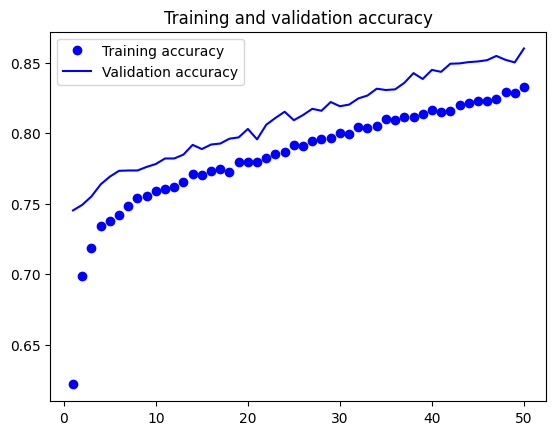

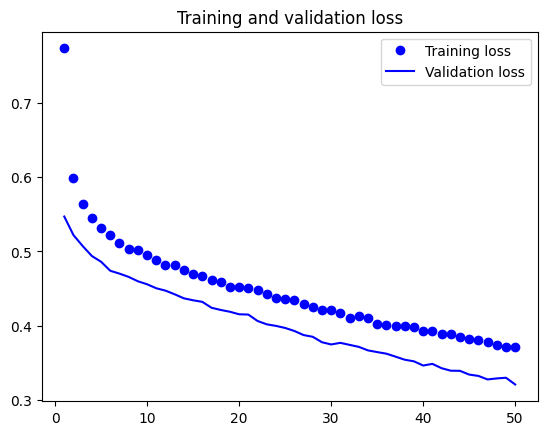

In [38]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [39]:
score=model.evaluate(X_test_re, y_test)
print(score)

136/136 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8655
[0.3081206977367401, 0.865517258644104]


In [40]:
y_pred = model.predict(X_test_re)

136/136 [==============================] - 0s 2ms/step


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [42]:
y_expected=pd.DataFrame(y_test)

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

In [44]:
cnf = confusion_matrix(y_test, y_pred.round())

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          text_fontsize='medium'):  # Add a parameter for text font size
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=text_fontsize)  # Set the font size here

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

##Confusion Matrix

Normalized confusion matrix
[[0.75230627 0.24769373]
 [0.02199817 0.97800183]]


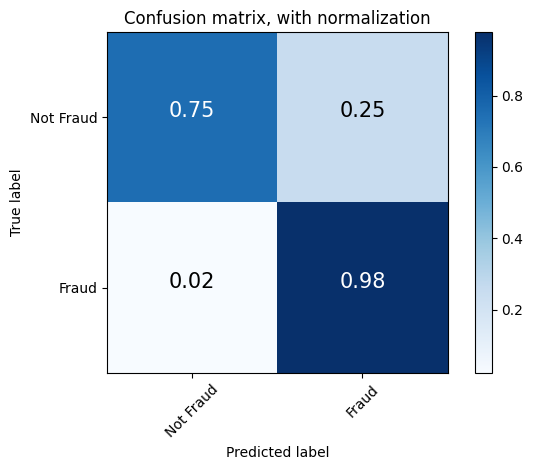

In [46]:
plt.figure()
plot_confusion_matrix(cnf, classes=['Not Fraud','Fraud'], normalize = True,
                      title='Confusion matrix, with normalization',text_fontsize=15)

Confusion matrix, without normalization
[[1631  537]
 [  48 2134]]


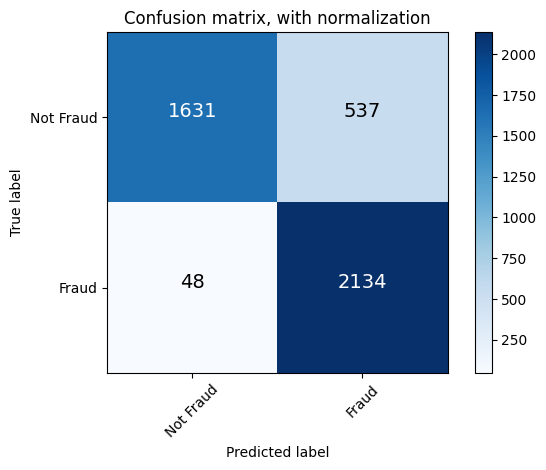

In [47]:
plt.figure()
plot_confusion_matrix(cnf, classes=['Not Fraud','Fraud'], normalize = False,
                      title='Confusion matrix, with normalization',text_fontsize=14)

##CNN Classification report

In [48]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      2168
           1       0.80      0.98      0.88      2182

    accuracy                           0.87      4350
   macro avg       0.89      0.87      0.86      4350
weighted avg       0.88      0.87      0.86      4350



In [49]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.8655172413793103
0.798951703481842
0.9780018331805683
0.8794560065938595


In [50]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

# Print the metrics as percentages
print('Accuracy: {:0.2f}%'.format(accuracy * 100))
print('Precision: {:0.2f}%'.format(precision * 100))
print('Recall: {:0.2f}%'.format(recall * 100))
print('F1 Score: {:0.2f}%'.format(f1 * 100))

Accuracy: 86.55%
Precision: 79.90%
Recall: 97.80%
F1 Score: 87.95%


Export the data in the csv file

In [ ]:
# Assuming X_train, X_val, X_test, y_train, y_val, y_test are your datasets
# Convert to DataFrame for easier saving (if they are NumPy arrays)
X_train_df = pd.DataFrame(X_train)
X_val_df = pd.DataFrame(X_val)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
y_test_df = pd.DataFrame(y_test)

# Save to CSV
X_train_df.to_csv('X_train.csv', index=False)
X_val_df.to_csv('X_val.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_val_df.to_csv('y_val.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

Save the training model

In [51]:
model.save('CNN_ADASYN_OverSampling.keras')  # Creates a HDF5 file 'my_model.h5'

Load the model later

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the model
# loaded_model = load_model('my_model.h5')

#CNN-LSTM

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout, MaxPool1D, LSTM
from tensorflow.keras.optimizers import Adam

In [53]:
model_lstm = Sequential()

#1st layer
model_lstm.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=X_train_re[0].shape))

#2nd layer
model_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=X_train_re[0].shape))

#3rd layer
model_lstm.add(LSTM(20, return_sequences=True, input_shape=X_train_re[0].shape))

#4th layer
#model.add(LSTM(256, return_sequences=True, input_shape=X_train_re[0].shape))

# build DNN
model_lstm.add(Flatten())
model_lstm.add(Dense(1, activation='sigmoid'))

In [54]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 62, 128)           512       
                                                                 
 conv1d_3 (Conv1D)           (None, 60, 64)            24640     
                                                                 
 lstm (LSTM)                 (None, 60, 20)            6800      
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 33153 (129.50 KB)
Trainable params: 33153 (129.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model_lstm.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history_lstm = model_lstm.fit(X_train_re, y_train, epochs=50, validation_data=(X_val_re, y_val))

Epoch 1/50
635/635 [==============================] - 10s 9ms/step - loss: 0.6323 - accuracy: 0.6536 - val_loss: 0.5566 - val_accuracy: 0.7306
Epoch 2/50
635/635 [==============================] - 5s 8ms/step - loss: 0.5338 - accuracy: 0.7421 - val_loss: 0.5202 - val_accuracy: 0.7545
Epoch 3/50
635/635 [==============================] - 6s 10ms/step - loss: 0.5106 - accuracy: 0.7555 - val_loss: 0.5060 - val_accuracy: 0.7572
Epoch 4/50
635/635 [==============================] - 5s 8ms/step - loss: 0.4985 - accuracy: 0.7614 - val_loss: 0.4959 - val_accuracy: 0.7628
Epoch 5/50
635/635 [==============================] - 6s 9ms/step - loss: 0.4899 - accuracy: 0.7673 - val_loss: 0.4862 - val_accuracy: 0.7694
Epoch 6/50
635/635 [==============================] - 5s 8ms/step - loss: 0.4828 - accuracy: 0.7711 - val_loss: 0.4853 - val_accuracy: 0.7664
Epoch 7/50
635/635 [==============================] - 5s 8ms/step - loss: 0.4772 - accuracy: 0.7712 - val_loss: 0.4793 - val_accuracy: 0.7710
Epoc

##Accuracy Validation

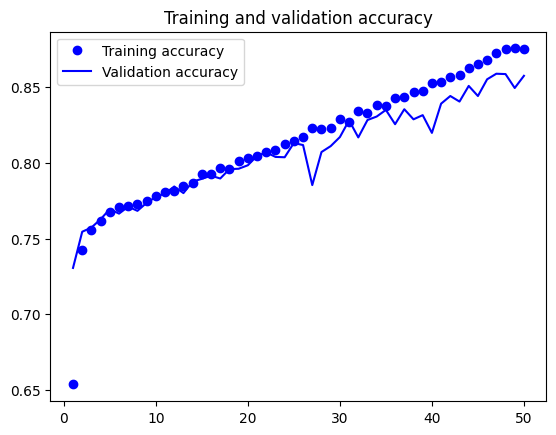

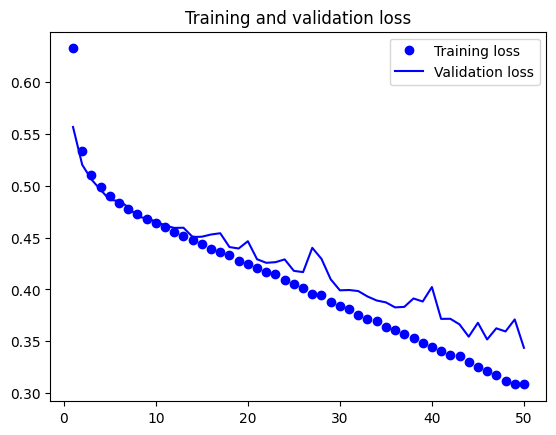

In [57]:
accuracy = history_lstm.history["accuracy"]
val_accuracy = history_lstm.history["val_accuracy"]
loss = history_lstm.history["loss"]
val_loss = history_lstm.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [58]:
score_lstm=model_lstm.evaluate(X_test_re, y_test)
print(score_lstm)

136/136 [==============================] - 1s 4ms/step - loss: 0.3338 - accuracy: 0.8602
[0.3338375389575958, 0.8602299094200134]


In [59]:
y_pred_lstm = model_lstm.predict(X_test_re)

136/136 [==============================] - 1s 4ms/step


In [60]:
y_expected_lstm=pd.DataFrame(y_test)

In [61]:
cnf_lstm = confusion_matrix(y_test, y_pred_lstm.round())

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

##Confusion Matrix

Normalized confusion matrix
[[0.82979705 0.17020295]
 [0.10953254 0.89046746]]


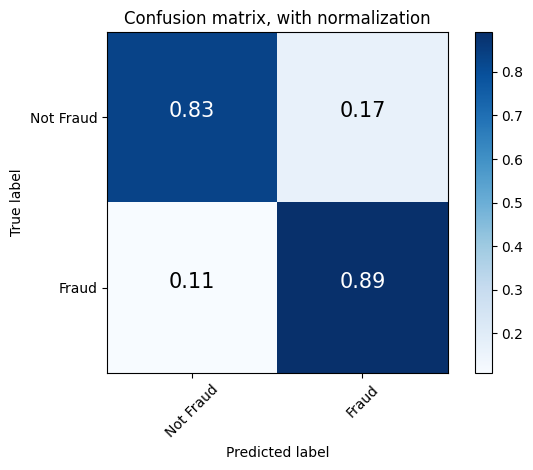

In [63]:
plt.figure()
plot_confusion_matrix(cnf_lstm, classes=['Not Fraud','Fraud'], normalize = True,
                      title='Confusion matrix, with normalization',text_fontsize=15)

Confusion matrix, without normalization
[[1799  369]
 [ 239 1943]]


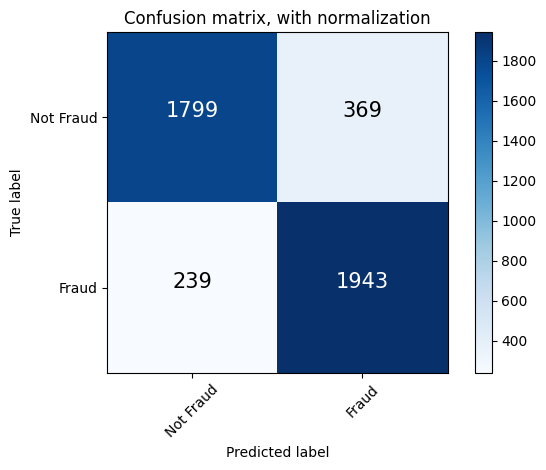

In [64]:
plt.figure()
plot_confusion_matrix(cnf_lstm, classes=['Not Fraud','Fraud'], normalize = False,
                      title='Confusion matrix, with normalization',text_fontsize=15)

##CNN-LSTM Classification

In [65]:
print(classification_report(y_test, y_pred_lstm.round()))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      2168
           1       0.84      0.89      0.86      2182

    accuracy                           0.86      4350
   macro avg       0.86      0.86      0.86      4350
weighted avg       0.86      0.86      0.86      4350



In [66]:
# Calculate the metrics
accuracy_lstm = accuracy_score(y_test, y_pred_lstm.round())
precision_lstm = precision_score(y_test, y_pred_lstm.round())
recall_lstm = recall_score(y_test, y_pred_lstm.round())
f1_lstm = f1_score(y_test, y_pred_lstm.round())

# Print the metrics as percentages
print('Accuracy: {:0.2f}%'.format(accuracy_lstm * 100))
print('Precision: {:0.2f}%'.format(precision_lstm * 100))
print('Recall: {:0.2f}%'.format(recall_lstm * 100))
print('F1 Score: {:0.2f}%'.format(f1_lstm * 100))

Accuracy: 86.02%
Precision: 84.04%
Recall: 89.05%
F1 Score: 86.47%


In [67]:
model_lstm.save('CNN-LSTM_RandomOverSampling.keras')